<a href="https://colab.research.google.com/github/bonezone0707/CSC115-WEEK-4/blob/main/Week9_Assignment_9_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1A. Load the dataset into a pandas dataframe and answer the following questions:

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

1B. Describe the structure of the diabetes dataset (size,features, data types)

In [7]:
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name="target")

# Combine features and target into one DataFrame for easy exploration
df = pd.concat([X, y], axis=1)

2. Show the relationships between the target variable and the features using scatter plot and correlation analysis.

Dataset Shape: (442, 11)

Feature Names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Data Types:
 age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

First 5 Rows:
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   

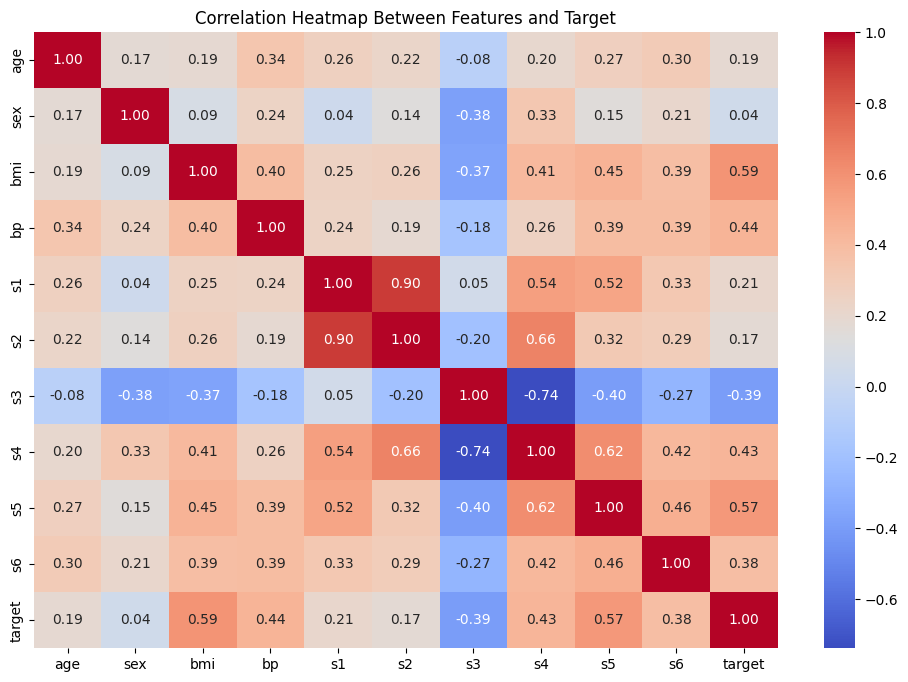

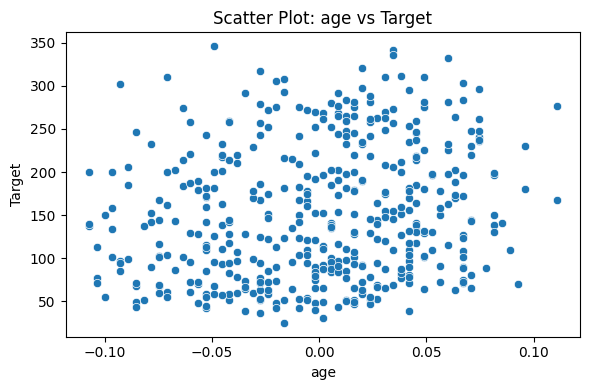

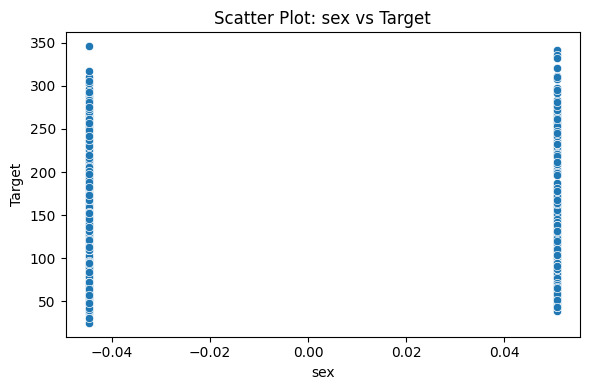

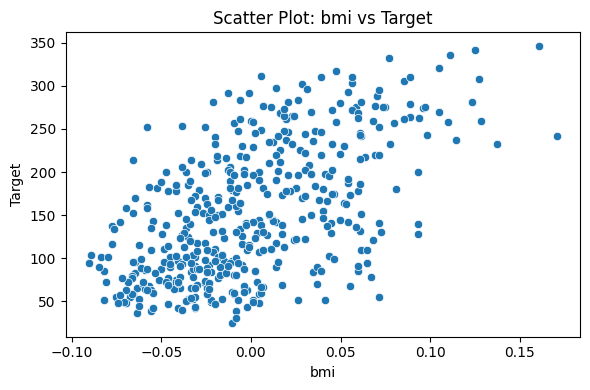

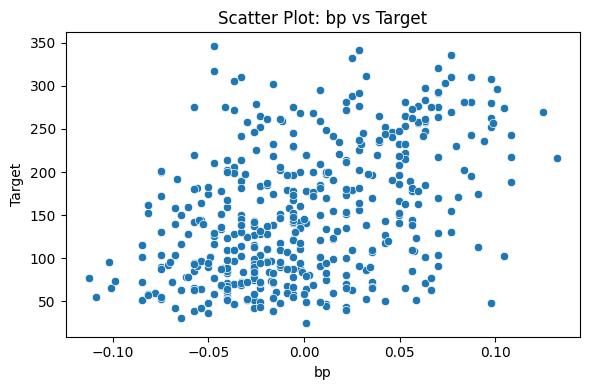

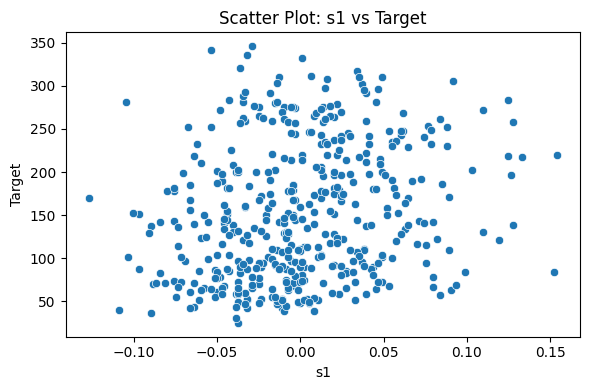

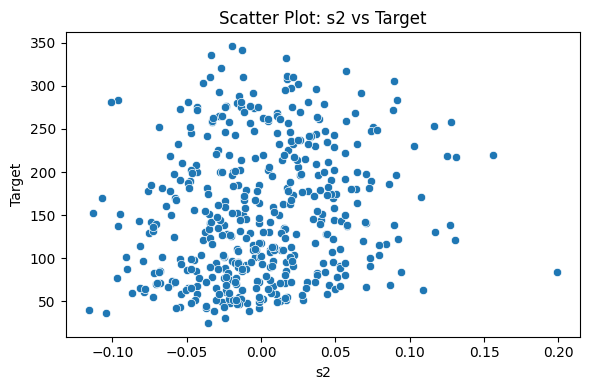

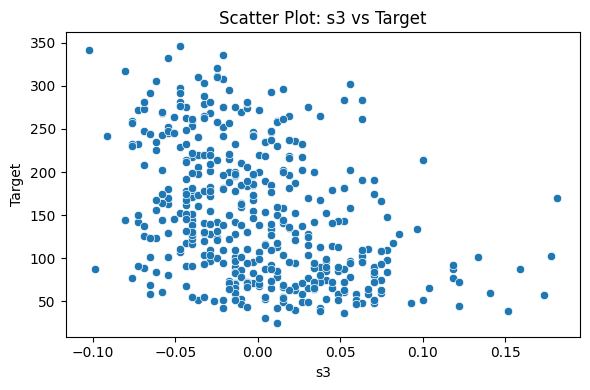

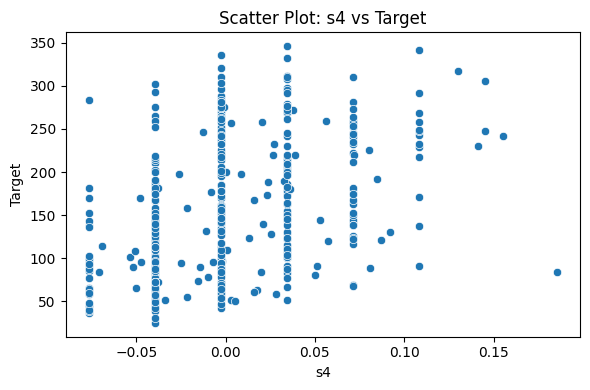

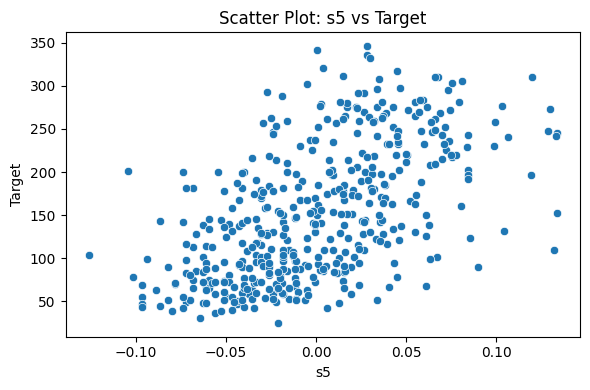

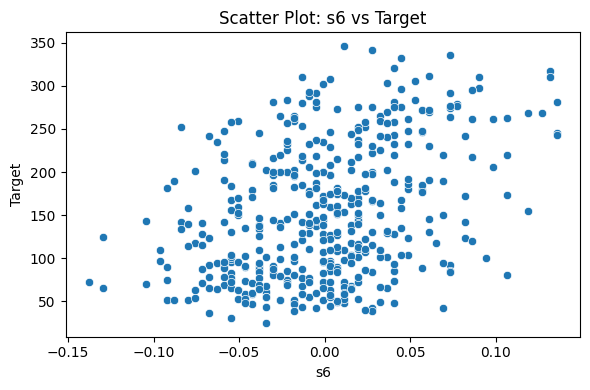

In [8]:
# Print basic information about the dataset
print("Dataset Shape:", df.shape)  # Number of rows and columns
print("\nFeature Names:", diabetes.feature_names)  # List of feature names
print("\nData Types:\n", df.dtypes)  # Data type of each column
print("\nFirst 5 Rows:\n", df.head())  # Preview of first 5 rows

# Correlation matrix heatmap to examine relationships between features and target
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap Between Features and Target")
plt.show()

# Scatter plots: visualize relationship between each feature and the target variable
for feature in diabetes.feature_names:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['target'])
    plt.title(f"Scatter Plot: {feature} vs Target")
    plt.xlabel(feature)
    plt.ylabel("Target")
    plt.tight_layout()
    plt.show()

3. Build a Simple Linear Regression Model (Single Feature):

 1. Choose a single feature (body mass index) as the predictor variable and the s6 glu, blood sugar level as the target variable.

 2. Split the dataset into training and testing sets.

 3. Train a simple linear regression model using the training data.

 4. Evaluate the model's accuracy using metrics such as mean squared error (MSE) or R-squared on both the training and testing sets.

 5. Visualize the actual vs. predicted values of the target variable on the testing set.

Single Feature Model (bmi):
Training MSE: 3854.11265207582
Testing MSE: 4061.8259284949268
Training R² Score: 0.3657241273794126
Testing R² Score: 0.23335039815872138


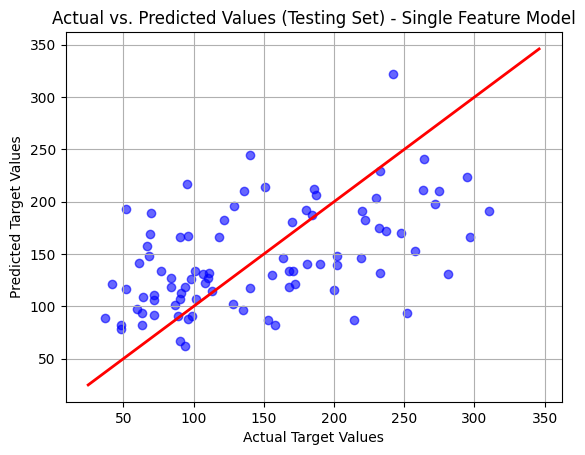

In [9]:
# Select 'bmi' as the single predictor variable
X_bmi = X[['bmi']]

# Split the data into training (80%) and testing (20%) sets with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

# Create and train the linear regression model on training data
model_single = LinearRegression()
model_single.fit(X_train, y_train)

# Predict target values for both training and testing sets
y_train_pred = model_single.predict(X_train)
y_test_pred = model_single.predict(X_test)

# Evaluate model performance using Mean Squared Error (MSE) and R-squared (R²) metrics
print("Single Feature Model (bmi):")
print("Training MSE:", mean_squared_error(y_train, y_train_pred))
print("Testing MSE:", mean_squared_error(y_test, y_test_pred))
print("Training R² Score:", r2_score(y_train, y_train_pred))
print("Testing R² Score:", r2_score(y_test, y_test_pred))

# Visualize actual vs predicted target values on the test set
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)  # Perfect prediction line
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs. Predicted Values (Testing Set) - Single Feature Model')
plt.grid(True)
plt.show()


4. Build a Simple Linear Regression Model (Two Features):

1.Select two features (body mass index and age in years) as predictor variables and the s6 glu, blood sugar level as the target variable.

2.Split the dataset into training and testing sets.
Train a simple linear regression model using the training data.

3.Assess the model's accuracy using metrics such as MSE or R-squared on both the training and testing sets.

4.Visualize the actual vs. predicted values of the target variable on the testing set.


Two Feature Model (bmi, age):
Training MSE: 3808.8578632933104
Testing MSE: 4052.775428111814
Training R² Score: 0.37317176143593844
Testing R² Score: 0.235058635448385


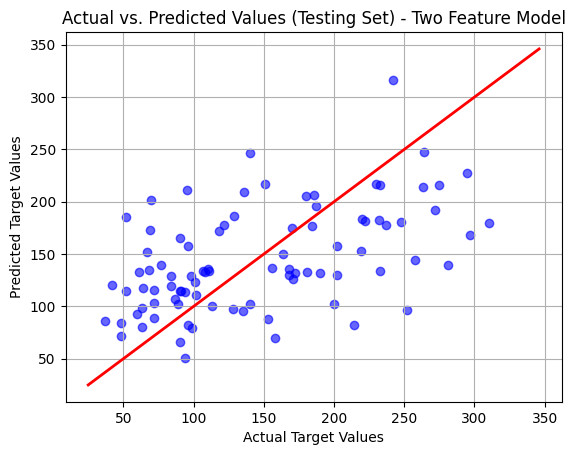

In [10]:
# Select 'bmi' and 'age' as predictor variables
X_two = X[['bmi', 'age']]

# Split data into training and testing sets (same 80-20 split, same random state)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_two, y, test_size=0.2, random_state=42)

# Create and train the linear regression model using two features
model_two = LinearRegression()
model_two.fit(X_train2, y_train2)

# Predict target values on training and testing sets
y_train_pred2 = model_two.predict(X_train2)
y_test_pred2 = model_two.predict(X_test2)

# Evaluate the model
print("\nTwo Feature Model (bmi, age):")
print("Training MSE:", mean_squared_error(y_train2, y_train_pred2))
print("Testing MSE:", mean_squared_error(y_test2, y_test_pred2))
print("Training R² Score:", r2_score(y_train2, y_train_pred2))
print("Testing R² Score:", r2_score(y_test2, y_test_pred2))

# Visualize actual vs predicted values on the test set
plt.scatter(y_test2, y_test_pred2, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs. Predicted Values (Testing Set) - Two Feature Model')
plt.grid(True)
plt.show()